In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("input/OnlineRetail.csv", encoding="latin1")
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

data['Revenue'] = data['UnitPrice'] * data['Quantity']
revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


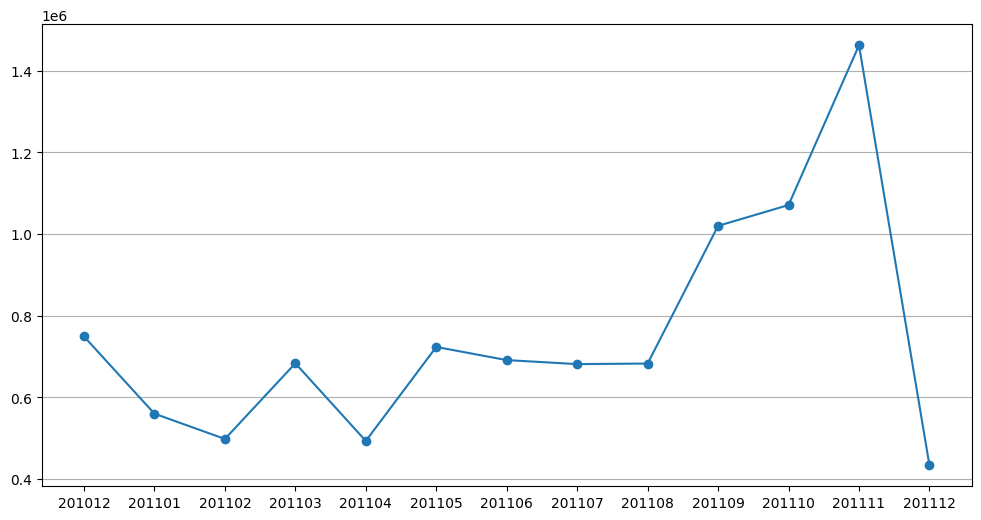

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(revenue["InvoiceYearMonth"].to_numpy(dtype=str), revenue["Revenue"].to_numpy(), marker="o")
plt.grid(axis='y')
plt.show()

In [19]:
revenue['MonthlyGrowth'] = revenue['Revenue'].pct_change()

revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


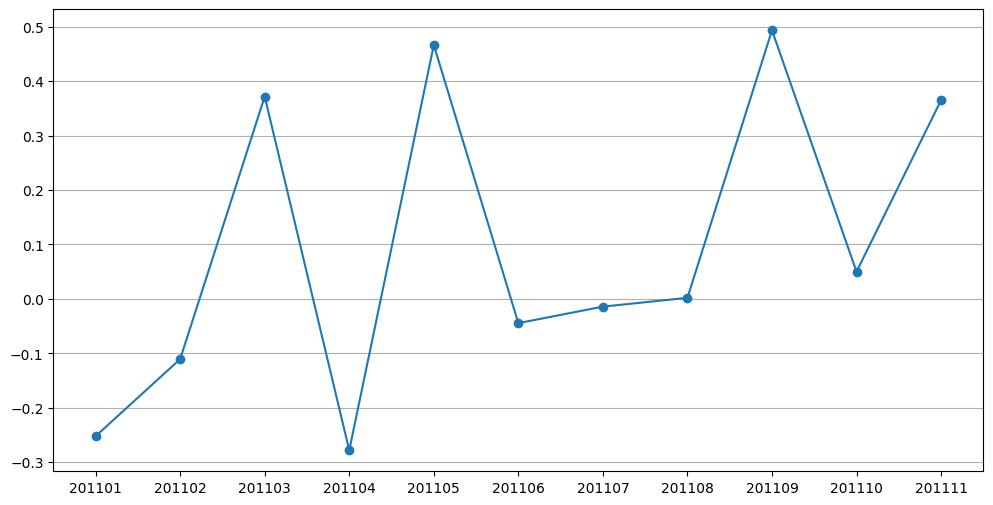

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(revenue.query("InvoiceYearMonth < 201112")["InvoiceYearMonth"].to_numpy(dtype=str),
         revenue.query("InvoiceYearMonth < 201112")["MonthlyGrowth"].to_numpy(),
         marker="o")
plt.grid(axis='y')
plt.show()

In [24]:
uk_data = data.query("Country=='United Kingdom'").reset_index(drop=True)

monthly_active = uk_data.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


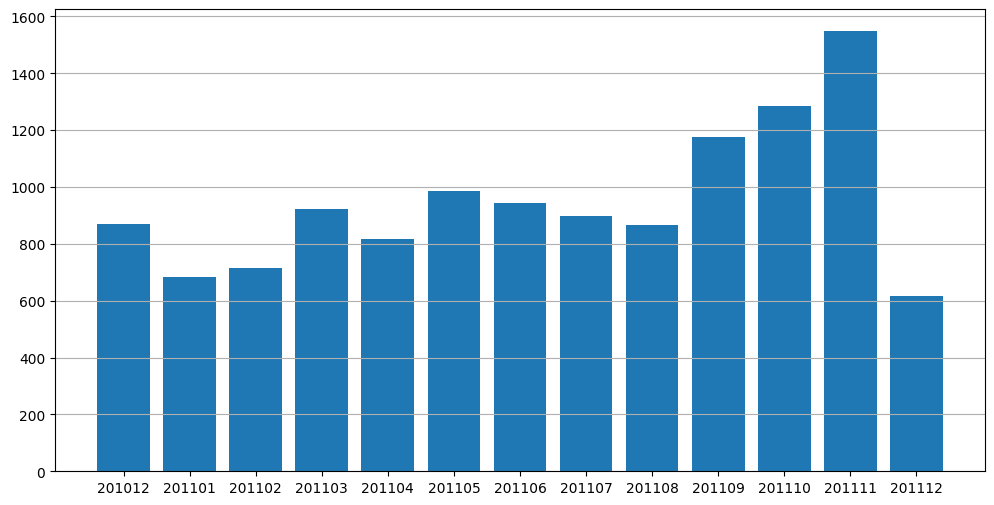

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_active["InvoiceYearMonth"].to_numpy(dtype=str),
        monthly_active["CustomerID"].to_numpy())
plt.grid(axis='y')
plt.show()

In [28]:
monthly_sales = uk_data.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


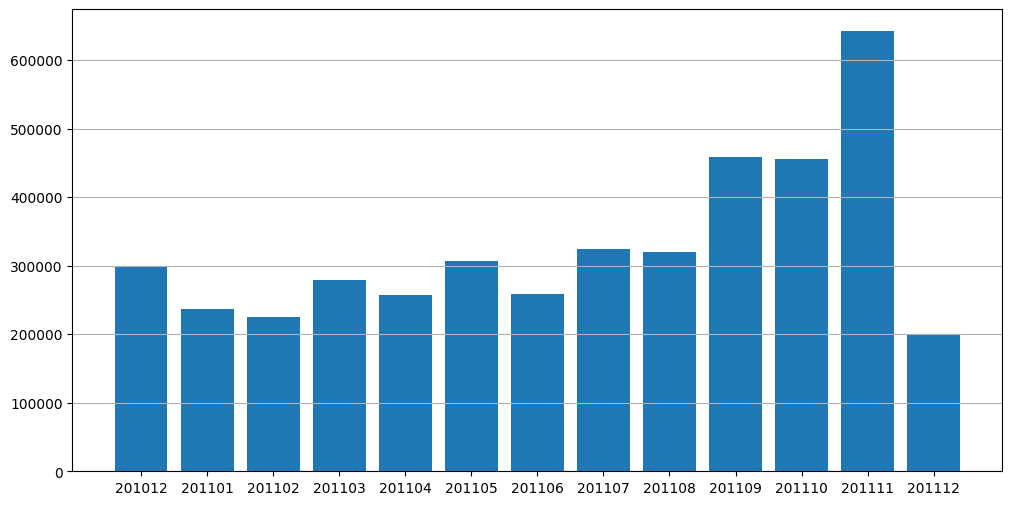

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales["InvoiceYearMonth"].to_numpy(dtype=str),
        monthly_sales["Quantity"].to_numpy())
plt.grid(axis='y')
plt.show()

In [32]:
monthly_order_avg = uk_data.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


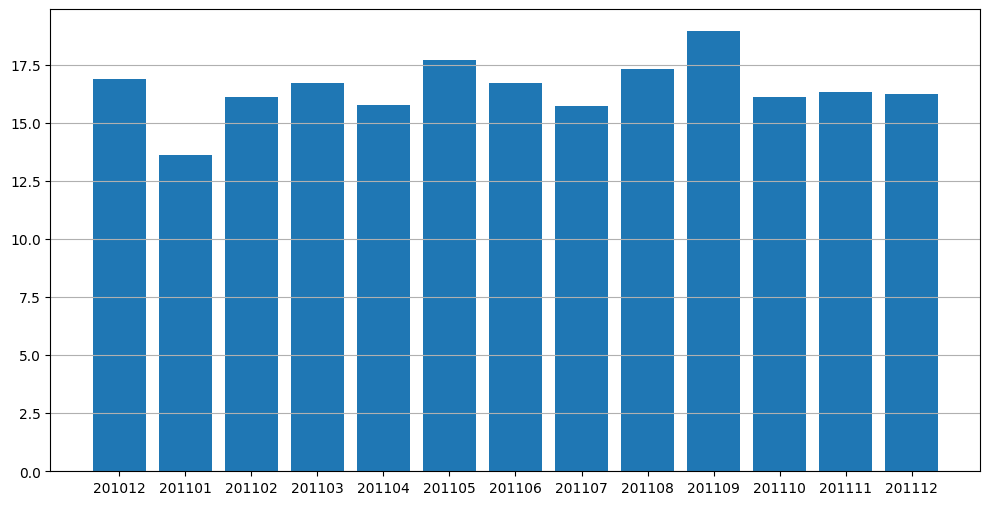

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_order_avg["InvoiceYearMonth"].to_numpy(dtype=str),
        monthly_order_avg["Revenue"].to_numpy())
plt.grid(axis='y')
plt.show()

In [61]:
min_purchase = uk_data.groupby('CustomerID').InvoiceDate.min().reset_index()
min_purchase.columns = ['CustomerID','MinPurchaseDate']
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

uk_data = pd.merge(uk_data, min_purchase, on='CustomerID')

uk_data.head()

uk_data['UserType'] = 'New'
uk_data.loc[uk_data['InvoiceYearMonth']>uk_data['MinPurchaseYearMonth'],'UserType'] = 'Existing'

user_type_revenue = uk_data.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

user_type_revenue = user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")


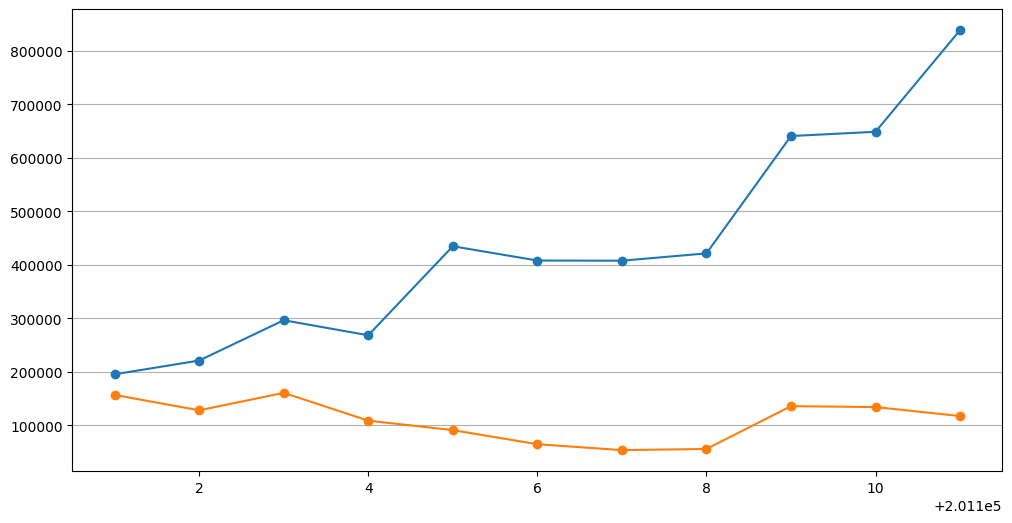

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
         user_type_revenue.query("UserType == 'Existing'")['Revenue'], marker="o")
plt.plot(user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
         user_type_revenue.query("UserType == 'New'")['Revenue'], marker="o")
plt.grid(axis='y')
plt.show()

In [64]:
user_ratio = uk_data.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/uk_data.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
user_ratio = user_ratio.reset_index()
user_ratio = user_ratio.dropna()

user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


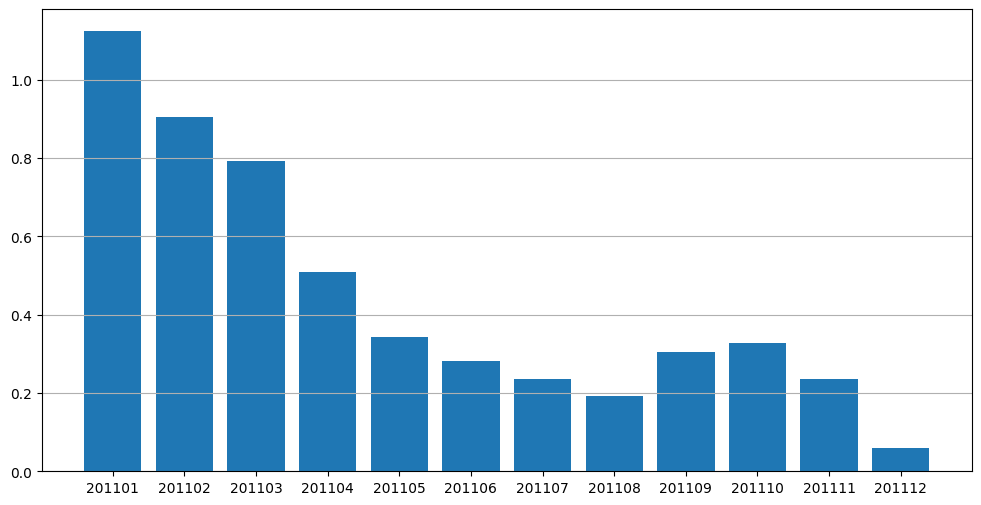

In [65]:
plt.figure(figsize=(12, 6))
plt.bar(user_ratio["InvoiceYearMonth"].to_numpy(dtype=str),
        user_ratio["CustomerID"].to_numpy())
plt.grid(axis='y')
plt.show()